In [7]:
import pandas as pd

df_2021 = pd.read_excel("national_M2021_dl.xlsx")
df_2022 = pd.read_excel("national_M2022_dl.xlsx")
df_2023 = pd.read_excel("national_M2023_dl.xlsx")
df_2024 = pd.read_excel("national_M2024_dl.xlsx")


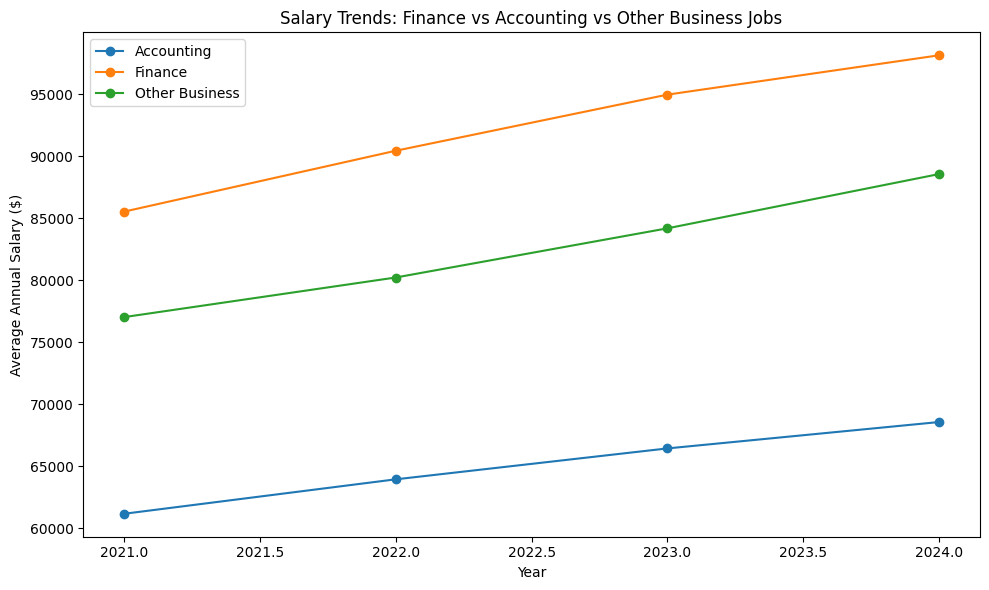

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Add year column to each DataFrame
df_2021["year"] = 2021
df_2022["year"] = 2022
df_2023["year"] = 2023
df_2024["year"] = 2024

# 2) Combine all years
df_all = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)
df_all.columns = df_all.columns.str.strip()       # clean col names

# 3) Create job-group labels
#    Accounting: anything with accountant / auditor / tax in the title
accounting_mask = df_all["OCC_TITLE"].str.contains(
    "Accountant|Auditor|Accounting|Tax Examiner|Tax Preparer",
    case=False, na=False
)

#    Finance: financial analysts, advisors, managers, credit, budget, loan, etc.
finance_mask = df_all["OCC_TITLE"].str.contains(
    "Financial|Credit|Budget|Loan Officer",
    case=False, na=False
)

#    Other business: everything in SOC major group 13-xxxx that isn't already finance/accounting
business_mask = df_all["OCC_CODE"].str.startswith("13")

df_all["Job_Group"] = None
df_all.loc[business_mask, "Job_Group"] = "Other Business"
df_all.loc[finance_mask, "Job_Group"] = "Finance"
df_all.loc[accounting_mask, "Job_Group"] = "Accounting"

# Keep only rows we classified
df_groups = df_all.dropna(subset=["Job_Group"])



# 4) Compute mean annual salary (A_MEAN) by year + Job_Group
salary_trend = (
    df_groups.groupby(["year", "Job_Group"])["A_MEAN"]
    .mean()
    .reset_index()
)

# 5) Pivot for plotting
pivot = salary_trend.pivot(index="year", columns="Job_Group", values="A_MEAN")

# 6) Plot the trends
plt.figure(figsize=(10, 6))

for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], marker="o", label=col)

plt.xlabel("Year")
plt.ylabel("Average Annual Salary ($)")
plt.title("Salary Trends: Finance vs Accounting vs Other Business Jobs")
plt.legend()
plt.tight_layout()
plt.show()


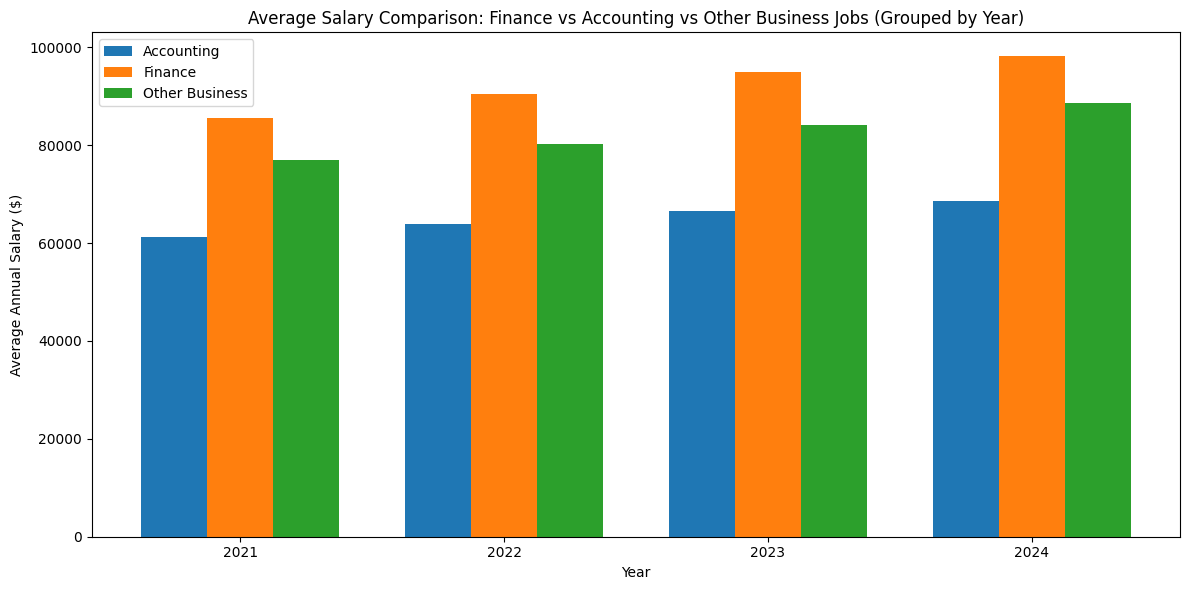

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# pivot must look like:
# year | Accounting | Finance | Other Business

pivot = salary_trend.pivot(index="year", columns="Job_Group", values="A_MEAN")

# --- GROUPED BAR CHART SETTINGS ---

years = pivot.index
groups = pivot.columns  # ['Accounting', 'Finance', 'Other Business']

bar_width = 0.25
x = np.arange(len(years))  # positions for bars

plt.figure(figsize=(12, 6))

# Plot each job category in a different color
for i, group in enumerate(groups):
    plt.bar(x + i*bar_width, pivot[group], width=bar_width, label=group)

# X-axis labels and ticks
plt.xticks(x + bar_width, years)

plt.xlabel("Year")
plt.ylabel("Average Annual Salary ($)")
plt.title("Average Salary Comparison: Finance vs Accounting vs Other Business Jobs (Grouped by Year)")
plt.legend()
plt.tight_layout()
plt.show()
